In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC

# Naive Bayes:

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

In [4]:
X_label, X_unlable, y_label, y_unlable = train_test_split(X, y, test_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2)

In [7]:
clf1 = GaussianNB().fit(X_train, y_train)
print(accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))
y_new = clf1.predict(X_unlable)
X_train_new = np.concatenate([X_train, X_unlable])
y_train_new = np.concatenate([y_train, y_new])
# clf2 = GaussianNB().fit(X_train_new, y_train_new)
clf2 = RFC(n_estimators=10).fit(X_train_new, y_train_new)
print(accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

0.7944444444444444
0.8555555555555555


# Clustering :

In [20]:
from sklearn.cluster import SpectralClustering

In [9]:
X_label, X_unlable, y_label, y_unlable = train_test_split(X, y, test_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2)

In [10]:
X_train_new = np.concatenate([X_train, X_unlable])

In [22]:
cls_label = SpectralClustering(n_clusters=10, 
                               affinity='nearest_neighbors').fit_predict(X_train_new)

In [25]:
cls_label[:10]

array([6, 5, 6, 5, 8, 2, 1, 6, 0, 5], dtype=int32)

In [37]:
# 4->0
# 8->1
# 2->2
# 3->3
# 7->4
# 1->5
# 6->6
# 0->7
# 5->8
# 9->9
for i in range(y_train.shape[0]):
    if y_train[i] == 9:
        print(cls_label[i])

3
3
0
3
3
3
3
3
9
3
5
3
3
9
3
3
3
3
0
3
3
9
3
3
3
9
3
3
3
0
0
9
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
9
3
3
3
3
3
9
3
3
9
3
3
3
3
3
9


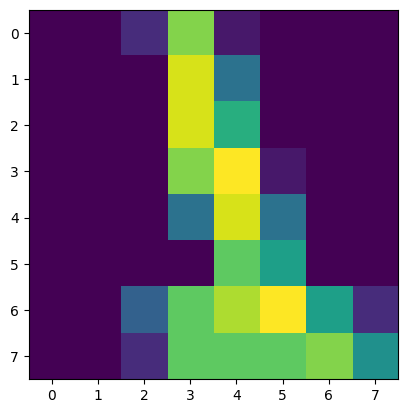

In [53]:
z = X_train_new[cls_label==8][np.random.randint(0, 10), :]

plt.imshow(np.reshape(z, (8, 8)))

In [ ]:
# 4->0
# 8->1
# 2->2
# 3->3
# 7->4
# 1->5
# 6->6
# 0->7
# 5->8
# 9->9

In [55]:
new_label = np.empty(cls_label.shape)
for i in range(cls_label.shape[0]):
    if cls_label[i] == 4:
        new_label[i] = 0
    if cls_label[i] == 8:
        new_label[i] = 1
    if cls_label[i] == 2:
        new_label[i] = 2
    if cls_label[i] == 3:
        new_label[i] = 3
    if cls_label[i] == 7:
        new_label[i] = 4
    if cls_label[i] == 1:
        new_label[i] = 5
    if cls_label[i] == 6:
        new_label[i] = 6
    if cls_label[i] == 0:
        new_label[i] = 7 
    if cls_label[i] == 5:
        new_label[i] = 8  
    if cls_label[i] == 9:
        new_label[i] = 9

In [56]:
new_label[:len(y_train)] = y_train

In [58]:
clf = RFC(n_estimators=10).fit(X_train_new, new_label)
print(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.7555555555555555


# Lablel Spreading & Lable Propagation:

In [59]:
from sklearn.datasets import make_moons

In [60]:
X, y = make_moons(n_samples=1000)

In [65]:
y_new = y.copy()

In [66]:
y_new[2:] = -1

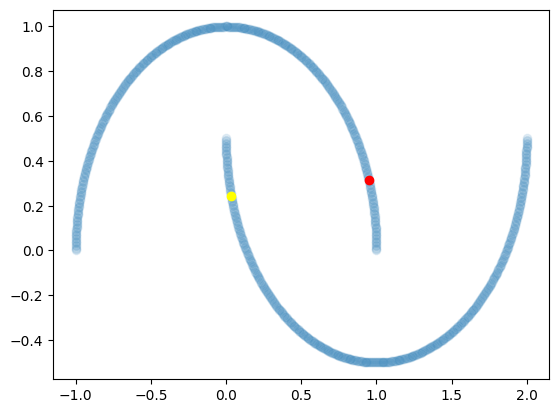

In [71]:
plt.scatter(X[y_new==-1, 0], X[y_new==-1, 1], alpha=0.1);
plt.scatter(X[y_new==1, 0], X[y_new==1, 1], c='yellow');
plt.scatter(X[y_new==0, 0], X[y_new==0, 1], c='red');

In [72]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [107]:
lp = LabelPropagation(kernel='knn', n_neighbors=4)
ls = LabelSpreading(kernel='knn', n_neighbors=4)

In [108]:
lp.fit(X, y_new)

LabelPropagation(kernel='knn', n_neighbors=4)

In [109]:
ls.fit(X, y_new)

LabelSpreading(kernel='knn', n_neighbors=4)

In [110]:
y_lp = lp.predict(X)
y_ls = ls.predict(X)

/Users/khamir/mambaforge/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:227: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


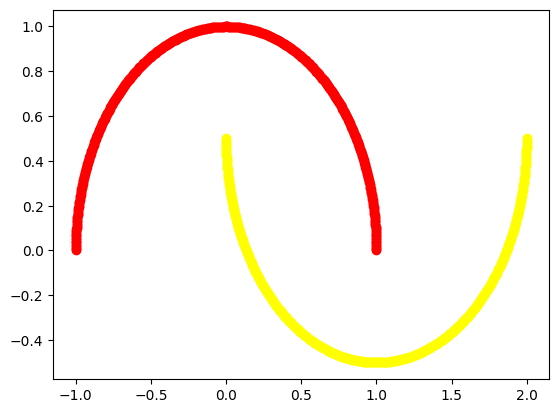

In [111]:
# plt.scatter(X[y_new==-1, 0], X[y_new==-1, 1], alpha=0.1);
plt.scatter(X[y_lp==1, 0], X[y_lp==1, 1], c='yellow');
plt.scatter(X[y_lp==0, 0], X[y_lp==0, 1], c='red');

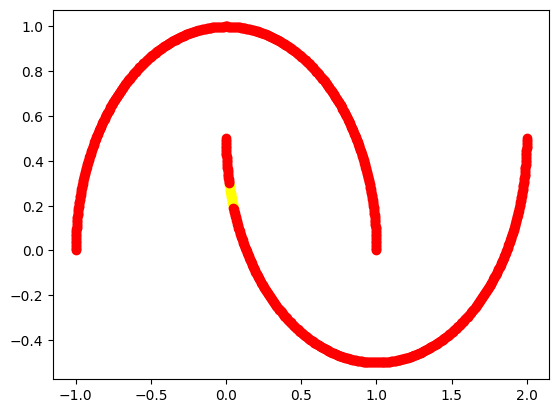

In [112]:
plt.scatter(X[y_ls==1, 0], X[y_ls==1, 1], c='yellow');
plt.scatter(X[y_ls==0, 0], X[y_ls==0, 1], c='red');